### Pirthvi Hasan G
### Data Science & Business Analytics
### GRIP - The Sparks Foundation
### Task 3 - EDA Retail

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.shape

(9994, 13)

## Data Wrangling

In [6]:
df.drop(["Country"], axis=1, inplace=True)

In [7]:
df.isnull().sum()

Ship Mode       0
Segment         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
df.duplicated().sum()

17

In [9]:
df.drop_duplicates(keep='first', inplace=True)

In [10]:
df.shape

(9977, 12)

In [11]:
df.sort_values(by='Sales',ascending=False, inplace=True)

In [12]:
df['z-score'] = (df.Sales - df.Sales.mean())/df.Sales.std() # z = (x-mu)/sigma
df.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,z-score
2697,Standard Class,Home Office,Jacksonville,Florida,32216,South,Technology,Machines,22638.480,6,0.5,-1811.0784,35.926827
6826,Standard Class,Corporate,Lafayette,Indiana,47905,Central,Technology,Copiers,17499.950,5,0.0,8399.9760,27.688325
8153,First Class,Consumer,Seattle,Washington,98115,West,Technology,Copiers,13999.960,4,0.0,6719.9808,22.076861
2623,First Class,Home Office,New York City,New York,10024,East,Technology,Copiers,11199.968,4,0.2,3919.9888,17.587690
4190,Standard Class,Consumer,Newark,Delaware,19711,East,Technology,Copiers,10499.970,3,0.0,5039.9856,16.465398


In [13]:
df = df[(df['z-score']<3) & (df['z-score']>-3)] # Removing data 3 z away from mean (outliers)
df.shape

(9850, 13)

## Data Visualisation

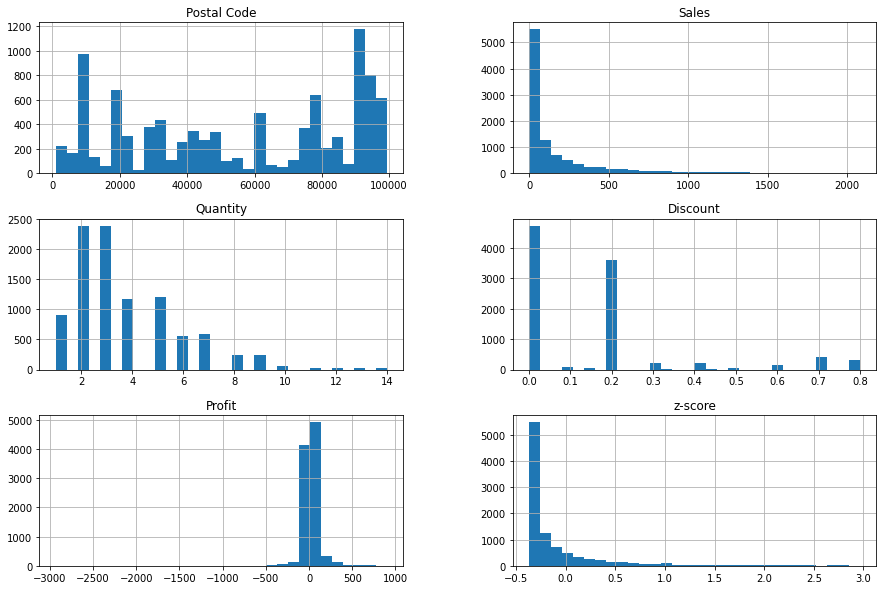

In [14]:
df.hist(bins=30,figsize=(15,10))
plt.show()

In [15]:
df.drop(['z-score','Postal Code'],axis=1, inplace=True)

<AxesSubplot:>

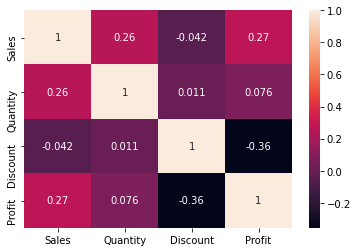

In [16]:
sns.heatmap(df.corr(),annot=True)

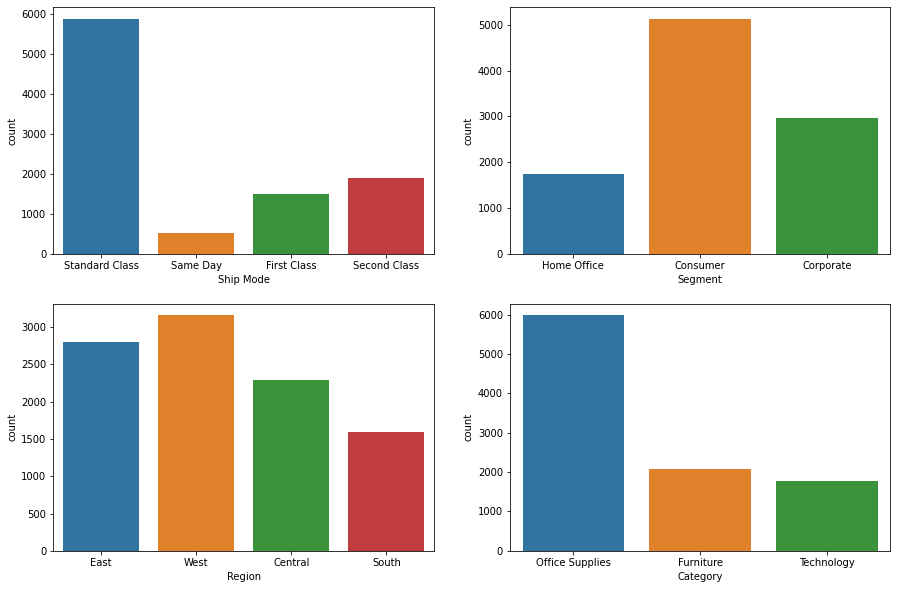

In [17]:
fig, ax = plt.subplots(2, 2, figsize=(15,10))
cols = ['Ship Mode','Segment','Region','Category']

for i in range(2):
    for j in range(2):
        sns.countplot(df[cols[2*i+j]], ax=ax[i,j])
plt.show()

<AxesSubplot:xlabel='Sub-Category', ylabel='count'>

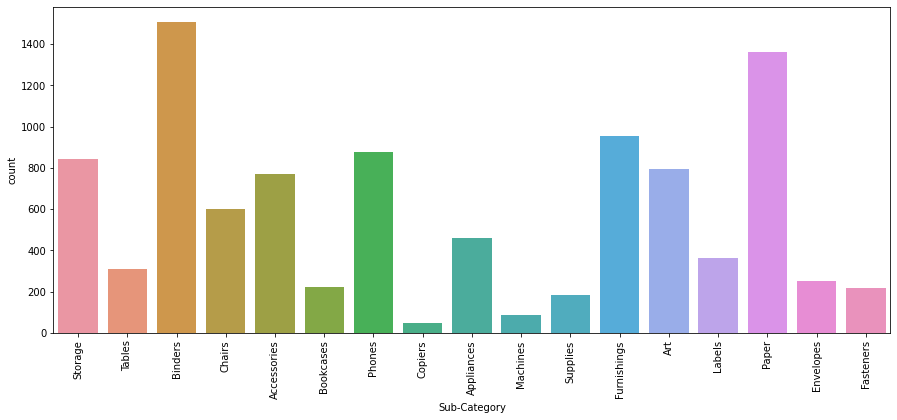

In [18]:
plt.figure(figsize=(15,6))
plt.xticks(rotation = 90)
sns.countplot(df['Sub-Category'])

### Discounts vs Profits - 'Category' wise

In [19]:
new_df = pd.DataFrame({'Total_Discount' : df.groupby(['Category']).Discount.sum(),'Total_Profit' : df.groupby(['Category']).Profit.sum()})
new_df.sort_values(by='Total_Profit',ascending=False, inplace=True)
new_df

,Total_Discount,Total_Profit
Category,,
Office Supplies,943.20,90137.4134
Technology,235.40,86961.0770
Furniture,364.12,14180.5464


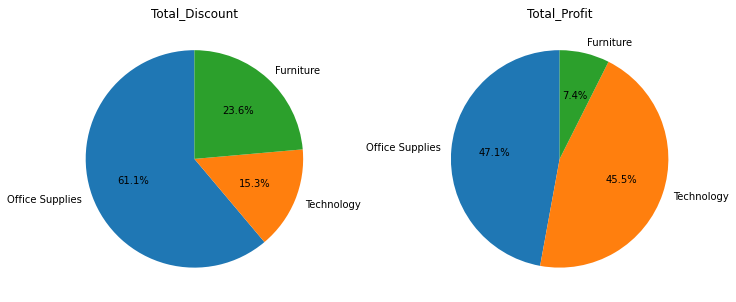

In [20]:
category = ['Office Supplies','Technology','Furniture']
cols = ['Total_Discount','Total_Profit']
fig = plt.figure(figsize=(12,5))

for i in range(2):
    ax1 = plt.subplot2grid((1,2),(0,i))
    plt.pie(new_df[cols[i]], labels=category, autopct='%1.1f%%', startangle=90)
    plt.title(cols[i])
plt.show()

We can infer that, **Technology** is the most profitable category, giving least discounts & gaining most profits.

### Discounts vs Profits - 'Region' wise

In [21]:
new_df = pd.DataFrame({'Total_Discount' : df.groupby(['Region']).Discount.sum(),'Total_Profit' : df.groupby(['Region']).Profit.sum()})
new_df.sort_values(by='Total_Profit',ascending=False, inplace=True)
new_df

,Total_Discount,Total_Profit
Region,,
West,344.15,83863.0740
East,409.30,53808.4599
South,235.65,37838.8593
Central,553.62,15768.6436


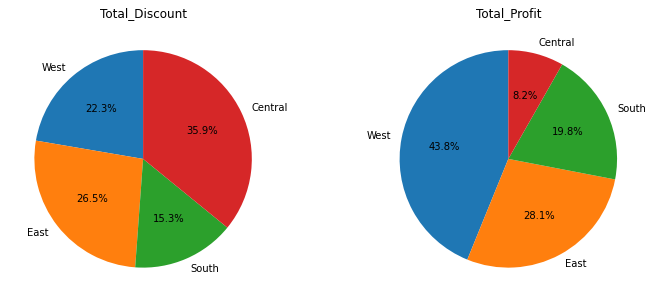

In [22]:
category = ['West','East','South','Central']
cols = ['Total_Discount','Total_Profit']
fig = plt.figure(figsize=(12,5))

for i in range(2):
    ax1 = plt.subplot2grid((1,2),(0,i))
    plt.pie(new_df[cols[i]], labels=category, autopct='%1.1f%%', startangle=90)
    plt.title(cols[i])
plt.show()

We can infer that, **West & East** are the most profitable regions, giving < 50% discounts & gaining > 70% profits.

### Quantity vs Sales - 'Category' wise

In [23]:
new_df = pd.DataFrame({'Total_Quantity' : df.groupby(['Category']).Quantity.sum(),'Total_Sales' : df.groupby(['Category']).Sales.sum()})
new_df.sort_values(by='Total_Sales',ascending=False, inplace=True)
new_df

,Total_Quantity,Total_Sales
Category,,
Furniture,7767,643351.3987
Office Supplies,22690,594047.0720
Technology,6571,543164.3200


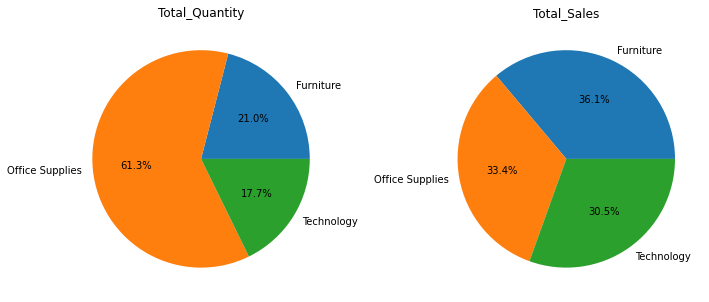

In [24]:
category = ['Furniture','Office Supplies','Technology']
cols = ['Total_Quantity','Total_Sales']
fig = plt.figure(figsize=(12,5))

for i in range(2):
    ax1 = plt.subplot2grid((1,2),(0,i))
    plt.pie(new_df[cols[i]], labels=category, autopct='%1.1f%%')
    plt.title(cols[i])
plt.show()

We can infer that, **Furniture & Technology**, despite having less quantity, they have produced majority of the sales.

### Top 5 Profitable Cities

In [30]:
city_df = df.groupby('City')['Profit'].sum().sort_values(ascending=False)
city_df.head(5)

City
New York City    34874.4919
Los Angeles      24583.2187
Seattle          17546.8109
San Francisco    15637.1237
Detroit           6819.3475
Name: Profit, dtype: float64

### Top 5 Profitable Sub-Categories

In [32]:
city_df = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)
city_df.head(5)

Sub-Category
Accessories    39503.4923
Phones         37886.6451
Paper          33944.2395
Chairs         21966.2259
Storage        19864.5829
Name: Profit, dtype: float64